In [1]:
## Underwstqanding Time series data
## This is basically data that changes over time
## Attributes of time series data
# Trend: upward or downward (increase or decrease)
# Seasonality: repeating patern over time
# Autocorrelation: predictable behaviourafter an event
# Noise: apparent randomness in time series data



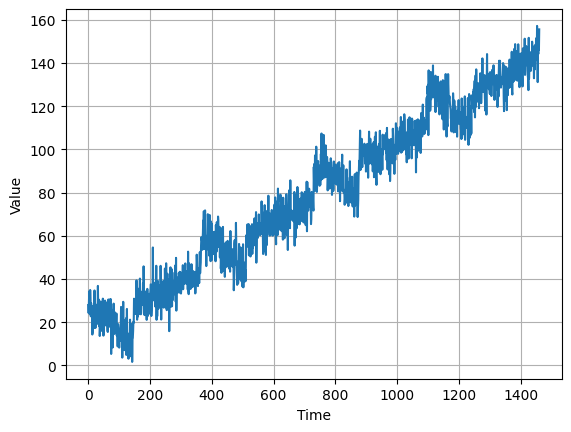

In [4]:
# Techniques for predicting Time Series data

# Create synthetic data

import matplotlib.pyplot as plt
import numpy as np

def plot_series(time, series, format="-", start = 0, end = None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)



def trend(time, slope=0):
  return slope * time

def seasonal_pattern(season_time):
   return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, .05)
baseline = 10
amplitude = 15
slope = 0.09
noise_level = 6

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

plot_series(time, series)


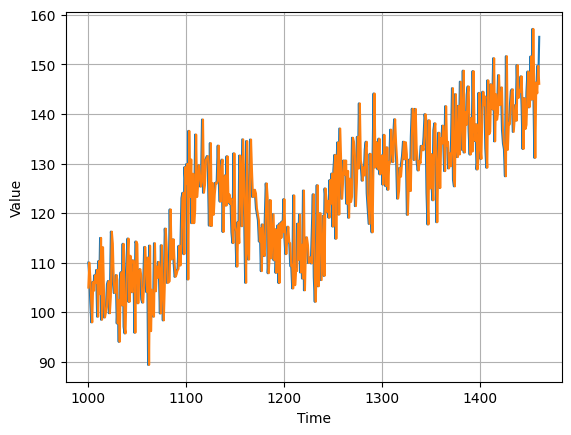

In [11]:
from matplotlib import colors
def plot2_series(time, series2, series, format="-", start = 0, end = None):
  plt.plot(time[start:end], series[start:end], format)
  plt.plot(time[start:end], series2[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

## Naive forecast, predicting the value at time t as the value at time t-1
split_time = 1000

naive_forecast = series[split_time - 1:-1]
ss = series[split_time:]
plot2_series(time[split_time:], naive_forecast, ss)

In [13]:
# Calculating the accuracy

from tensorflow import keras

mse = keras.metrics.MeanSquaredError()
mae = keras.metrics.MeanAbsoluteError()

print(mse(ss, naive_forecast).numpy())
print(mae(ss, naive_forecast).numpy())

76.47491
6.899298


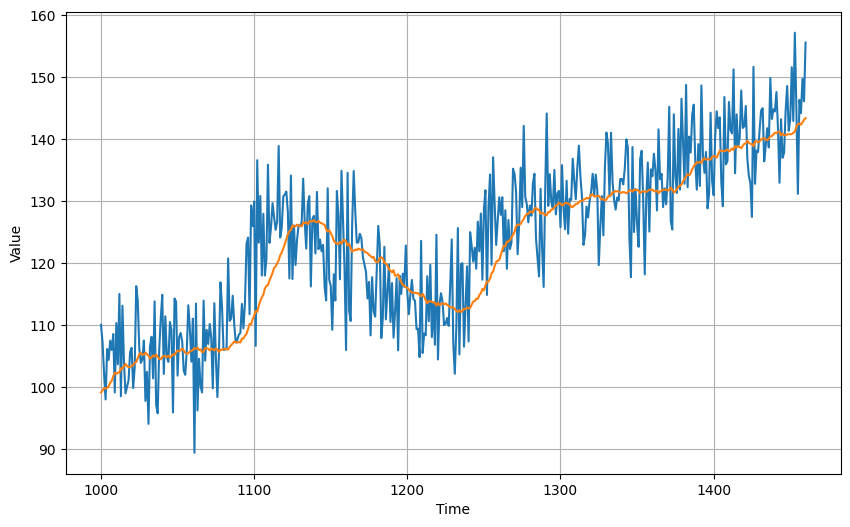

In [15]:
# Using the moving average for prediction

def moving_average_forecast(series, window_size):
    # Predictis the mean of the last few values as the next value
    # the number of values to be considered depends on the window_size
    forecast = []
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time[1000:], ss)
plot_series(time[1000:], moving_avg)

In [17]:
print(mse(ss, moving_avg).numpy())
print(mae(ss, moving_avg).numpy())

# a little better than the previous method

62.759674
6.2160664


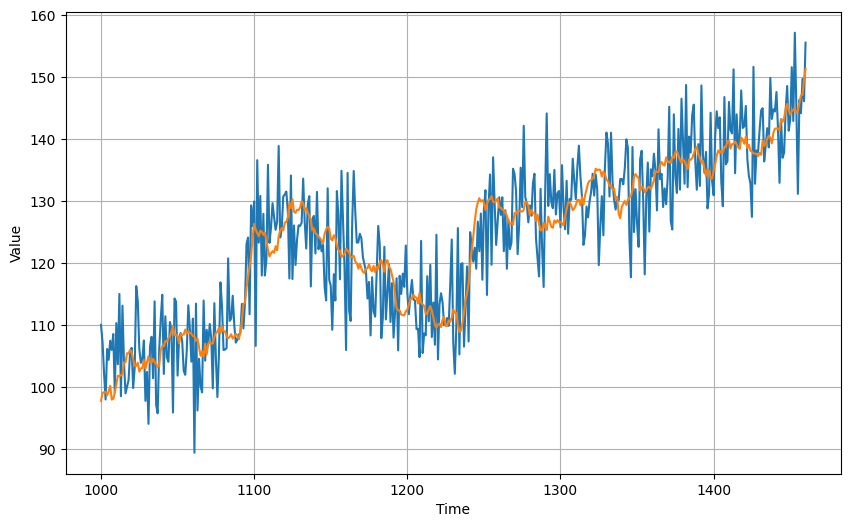

In [18]:
# Improving the moving average forecast
# we can do this by accounting for seasonality using a technique called differencing

diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time[1000:], ss)
plot_series(time[1000:], diff_moving_avg_plus_smooth_past)

In [19]:
print(mse(ss, diff_moving_avg_plus_smooth_past).numpy())
print(mae(ss, diff_moving_avg_plus_smooth_past).numpy())

# So much better than the last

55.473896
5.856045
